In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns',120)
pd.set_option('max_colwidth',5000)

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize']=(12,8)

In [2]:
# skip row 1 so that pandas can parse the data properly

loans_2007 = pd.read_csv("/home/niraj/Downloads/jaypeedevlin-lending-club-loan-data-2007-11/lending_club_loans.csv",skiprows=1,low_memory=False)

In [3]:
half_count = len(loans_2007)/2

In [6]:
loans_2007 = loans_2007.dropna(thresh=half_count,axis=1)

In [7]:
loans_2007 = loans_2007.drop(['url','desc'],axis=1)

In [8]:
loans_2007.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Sep-2016,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,695.0,699.0,0.0,15.0,0.0,27783.0,53.9%,38.0,f,270.78,270.78,3784.490000,3784.49,2729.22,1055.27,0.00,0.00,0.00,Sep-2016,67.79,Sep-2016,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [9]:
loans_2007.shape

(42538, 56)

In [10]:
data_dictionary=pd.read_csv("/home/niraj/Downloads/jaypeedevlin-lending-club-loan-data-2007-11/LCDataDictionary.csv")

In [11]:
data_dictionary.shape

(117, 2)

In [13]:
data_dictionary.columns.tolist()

['LoanStatNew', 'Description']

In [14]:
data_dictionary.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


In [26]:
loans_2007_dtypes=pd.DataFrame(loans_2007.dtypes,columns=['dtypes'])
loans_2007_dtypes

,dtypes
id,object
member_id,float64
loan_amnt,float64
funded_amnt,float64
funded_amnt_inv,float64
term,object
int_rate,object
installment,float64
grade,object
sub_grade,object


In [27]:
loans_2007_dtypes=loans_2007_dtypes.reset_index()

In [28]:
loans_2007_dtypes['name']=loans_2007_dtypes['index']
loans_2007_dtypes=loans_2007_dtypes[['name','dtypes']]

In [29]:
loans_2007_dtypes

,name,dtypes
0,id,object
1,member_id,float64
2,loan_amnt,float64
3,funded_amnt,float64
4,funded_amnt_inv,float64
5,term,object
6,int_rate,object
7,installment,float64
8,grade,object
9,sub_grade,object


In [30]:
loans_2007_dtypes['first value'] = loans_2007.loc[0].values
loans_2007_dtypes

,name,dtypes,first value
0,id,object,1077501
1,member_id,float64,1.2966e+06
2,loan_amnt,float64,5000
3,funded_amnt,float64,5000
4,funded_amnt_inv,float64,4975
5,term,object,36 months
6,int_rate,object,10.65%
7,installment,float64,162.87
8,grade,object,B
9,sub_grade,object,B2


In [32]:
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name',
                                                 'Description': 'description'})

In [33]:
preview = loans_2007_dtypes.merge(data_dictionary, on='name',how='left')

In [34]:
preview.head()

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975,The total amount committed by investors for that loan at that point in time.


In [35]:
preview[:19]

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975,The total amount committed by investors for that loan at that point in time.
5,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,object,10.65%,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if the loan originates.
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


In [36]:
drop_list = ['id','member_id','funded_amnt','funded_amnt_inv',
             'int_rate','sub_grade','emp_title','issue_d']
loans_2007 = loans_2007.drop(drop_list,axis=1)

In [37]:
preview[19:38]

,name,dtypes,first value,description
19,title,object,Computer,The loan title provided by the borrower
20,zip_code,object,860xx,The first 3 numbers of the zip code provided by the borrower in the loan application.
21,addr_state,object,AZ,The state provided by the borrower in the loan application
22,dti,float64,27.65,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
23,delinq_2yrs,float64,0,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
24,earliest_cr_line,object,Jan-1985,The month the borrower's earliest reported credit line was opened
25,fico_range_low,float64,735,The lower boundary range the borrower’s FICO at loan origination belongs to.
26,fico_range_high,float64,739,The upper boundary range the borrower’s FICO at loan origination belongs to.
27,inq_last_6mths,float64,1,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
28,open_acc,float64,3,The number of open credit lines in the borrower's credit file.


In [38]:
drop_cols = [ 'zip_code','out_prncp','out_prncp_inv',
             'total_pymnt','total_pymnt_inv']
loans_2007 = loans_2007.drop(drop_cols, axis=1)

In [39]:
preview[38:]

,name,dtypes,first value,description
38,total_rec_prncp,float64,5000,Principal received to date
39,total_rec_int,float64,863.16,Interest received to date
40,total_rec_late_fee,float64,0,Late fees received to date
41,recoveries,float64,0,post charge off gross recovery
42,collection_recovery_fee,float64,0,post charge off collection fee
43,last_pymnt_d,object,Jan-2015,Last month payment was received
44,last_pymnt_amnt,float64,171.62,Last total payment amount received
45,last_credit_pull_d,object,Sep-2016,The most recent month LC pulled credit for this loan
46,last_fico_range_high,float64,744,The upper boundary range the borrower’s last FICO pulled belongs to.
47,last_fico_range_low,float64,740,The lower boundary range the borrower’s last FICO pulled belongs to.


In [40]:
drop_cols = ['total_rec_prncp','total_rec_int', 'total_rec_late_fee',
             'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
             'last_pymnt_amnt']

loans_2007 = loans_2007.drop(drop_cols, axis=1)

In [41]:
print(loans_2007['fico_range_low'].unique())
print(loans_2007['fico_range_high'].unique())

[ 735.  740.  690.  695.  730.  660.  675.  725.  710.  705.  720.  665.
  670.  760.  685.  755.  680.  700.  790.  750.  715.  765.  745.  770.
  780.  775.  795.  810.  800.  815.  785.  805.  825.  820.  630.  625.
   nan  650.  655.  645.  640.  635.  610.  620.  615.]
[ 739.  744.  694.  699.  734.  664.  679.  729.  714.  709.  724.  669.
  674.  764.  689.  759.  684.  704.  794.  754.  719.  769.  749.  774.
  784.  779.  799.  814.  804.  819.  789.  809.  829.  824.  634.  629.
   nan  654.  659.  649.  644.  639.  614.  624.  619.]


(42538, 36)
(42535, 36)


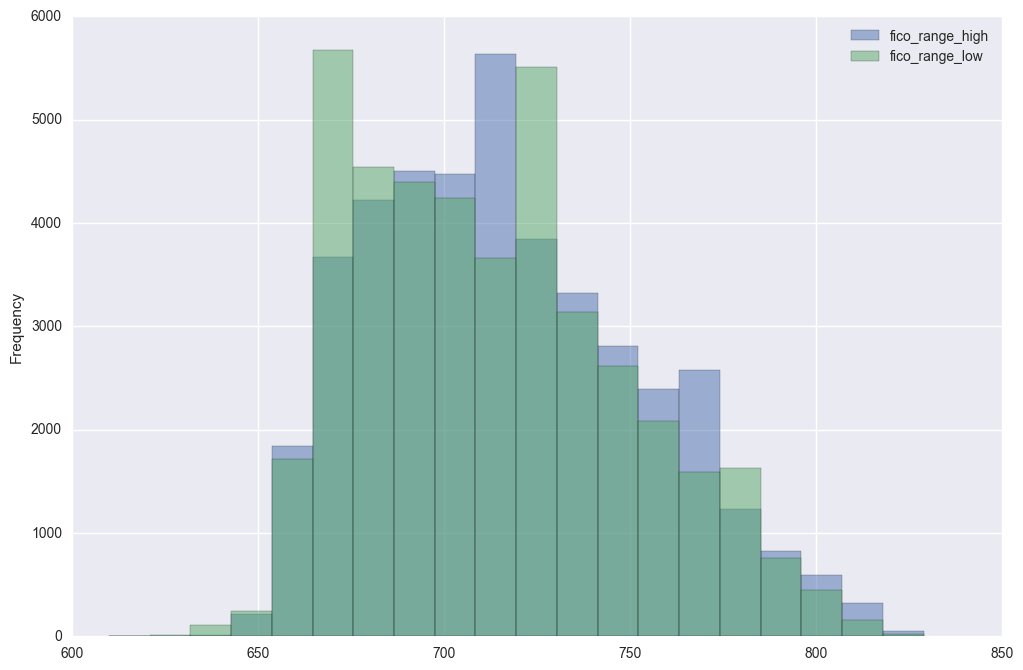

In [43]:
fico_columns=['fico_range_high','fico_range_low']

print(loans_2007.shape)
loans_2007.dropna(subset=fico_columns,inplace=True)
print(loans_2007.shape)

loans_2007[fico_columns].plot.hist(alpha=0.5,bins=20)

In [44]:
loans_2007['fico_average'] = (loans_2007['fico_range_high'] + loans_2007['fico_range_low'])/2

In [45]:
cols=['fico_range_low','fico_range_high','fico_average']
loans_2007[cols].head()

,fico_range_low,fico_range_high,fico_average
0,735.0,739.0,737.0
1,740.0,744.0,742.0
2,735.0,739.0,737.0
3,690.0,694.0,692.0
4,695.0,699.0,697.0


In [47]:
drop_cols=['fico_range_low','fico_range_high','last_fico_range_low','last_fico_range_high']
loans_2007=loans_2007.drop(drop_cols,axis=1)
loans_2007.shape


(42535, 33)

In [48]:
preview[preview.name=='loan_status']

,name,dtypes,first value,description
16,loan_status,object,Fully Paid,Current status of the loan


In [49]:
loans_2007['loan_status'].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [50]:
meaning = [
    "Loan has been fully paid off.",
    "Loan for which there is no longer a reasonable expectation of further payments.",
    "While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
    "While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
    "Loan is up to date on current payments.",
    "The loan is past due but still in the grace period of 15 days.",
    "Loan hasn't been paid in 31 to 120 days (late on the current payment).",
    "Loan hasn't been paid in 16 to 30 days (late on the current payment).",
    "Loan is defaulted on and no payment has been made for more than 121 days."]

In [51]:
status,count=loans_2007['loan_status'].value_counts().index,loans_2007['loan_status'].value_counts().values

In [53]:
loan_statuses_explanation =pd.DataFrame({'Loan_status':status,'Count':count,'Meaning':meaning})[['Loan_status','Count','Meaning']]
loan_statuses_explanation

,Loan_status,Count,Meaning
0,Fully Paid,33586,Loan has been fully paid off.
1,Charged Off,5653,Loan for which there is no longer a reasonable expectation of further payments.
2,Does not meet the credit policy. Status:Fully Paid,1988,"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
3,Does not meet the credit policy. Status:Charged Off,761,"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
4,Current,513,Loan is up to date on current payments.
5,In Grace Period,16,The loan is past due but still in the grace period of 15 days.
6,Late (31-120 days),12,Loan hasn't been paid in 31 to 120 days (late on the current payment).
7,Late (16-30 days),5,Loan hasn't been paid in 16 to 30 days (late on the current payment).
8,Default,1,Loan is defaulted on and no payment has been made for more than 121 days.


In [55]:
loans_2007=loans_2007[(loans_2007['loan_status']=='Fully Paid') | (loans_2007['loan_status']=='Charged Off')]


In [56]:
mapping_dictionary={"loan_status":{"Fully Paid":1,"Charged Off":0}}

In [57]:
loans_2007=loans_2007.replace(mapping_dictionary)

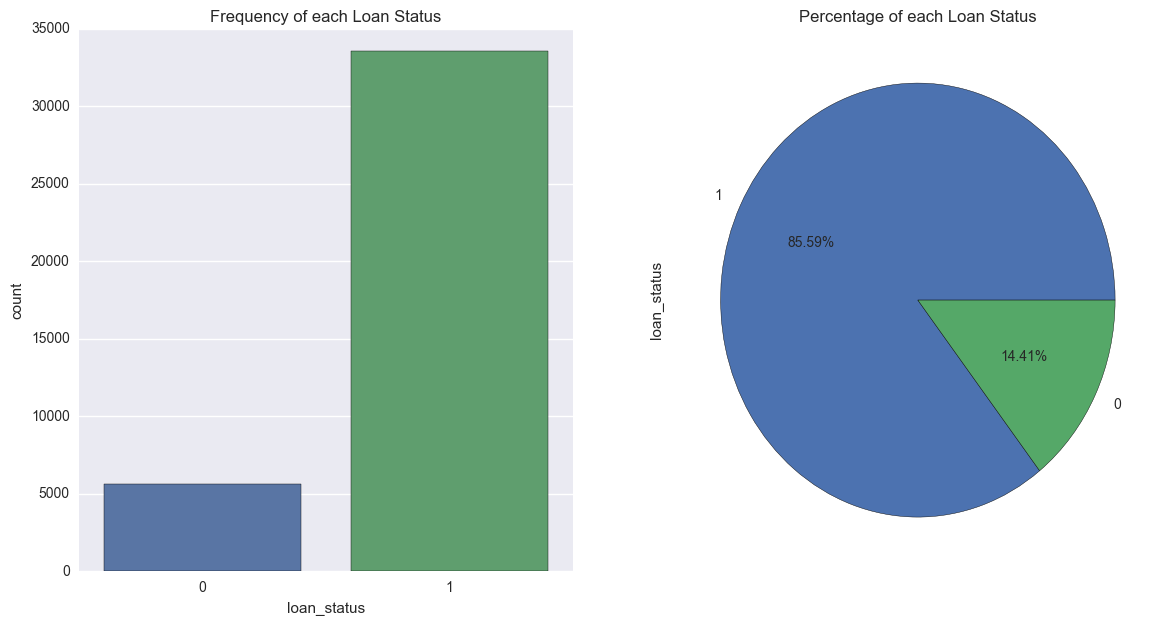

In [63]:
fig,axs=plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=loans_2007,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loans_2007.loan_status.value_counts().plot(x=None,y=None,kind="pie",ax=axs[1],autopct="%1.2f%%")
axs[1].set_title("Percentage of each Loan Status")
plt.show()

In [64]:
loans_2007=loans_2007.loc[:,loans_2007.apply(pd.Series.nunique)!=1]

In [66]:
for col in loans_2007.columns:
    if len(loans_2007[col].unique()) < 4:
        print(loans_2007[col].value_counts())
        print()

 36 months    29096
 60 months    10143
Name: term, dtype: int64

Not Verified       16845
Verified           12526
Source Verified     9868
Name: verification_status, dtype: int64

1    33586
0     5653
Name: loan_status, dtype: int64

n    39238
y        1
Name: pymnt_plan, dtype: int64



In [67]:
print(loans_2007.shape)

(39239, 25)


In [68]:
loans_2007=loans_2007.drop('pymnt_plan',axis=1)
print("We have been able to reduce the features to => {}".format(loans_2007.shape[1]))

We have been able to reduce the features to => 24


In [70]:
loans_2007.to_csv("~/Downloads/filtered_loans_2007.csv",index=False)

In [71]:
filtered_loans=pd.read_csv("/home/niraj/Downloads/filtered_loans_2007.csv")
print(filtered_loans.shape)
filtered_loans.head()

(39239, 24)


,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,credit_card,Computer,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,Sep-2016,0.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,car,bike,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,Sep-2016,0.0,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,1,small_business,real estate business,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,Sep-2016,0.0,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,1,other,personel,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,Apr-2016,0.0,692.0
4,5000.0,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,1,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3%,12.0,Jan-2016,0.0,732.0


In [72]:
null_counts=filtered_loans.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
loan_amnt                 0
term                      0
installment               0
grade                     0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
title                    10
addr_state                0
dti                       0
delinq_2yrs               0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util               50
total_acc                 0
last_credit_pull_d        2
pub_rec_bankruptcies    697
fico_average              0
dtype: int64


In [73]:
filtered_loans=filtered_loans.drop("pub_rec_bankruptcies",axis=1)
filtered_loans=filtered_loans.dropna()

In [74]:
print("Data types and their frequency\n{}".format(filtered_loans.dtypes.value_counts()))

Data types and their frequency
float64    11
object     11
int64       1
dtype: int64


In [77]:
object_columns_df=filtered_loans.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

term                     36 months
grade                            B
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        Sep-2016
Name: 0, dtype: object


In [78]:
object_columns_df

,term,grade,emp_length,home_ownership,verification_status,purpose,title,addr_state,earliest_cr_line,revol_util,last_credit_pull_d
0,36 months,B,10+ years,RENT,Verified,credit_card,Computer,AZ,Jan-1985,83.7%,Sep-2016
1,60 months,C,< 1 year,RENT,Source Verified,car,bike,GA,Apr-1999,9.4%,Sep-2016
2,36 months,C,10+ years,RENT,Not Verified,small_business,real estate business,IL,Nov-2001,98.5%,Sep-2016
3,36 months,C,10+ years,RENT,Source Verified,other,personel,CA,Feb-1996,21%,Apr-2016
4,36 months,A,3 years,RENT,Source Verified,wedding,My wedding loan I promise to pay back,AZ,Nov-2004,28.3%,Jan-2016
5,60 months,C,8 years,RENT,Not Verified,debt_consolidation,Loan,NC,Jul-2005,85.6%,Sep-2016
6,36 months,E,9 years,RENT,Source Verified,car,Car Downpayment,CA,Jan-2007,87.5%,Dec-2014
7,60 months,F,4 years,OWN,Source Verified,small_business,Expand Business & Buy Debt Portfolio,CA,Apr-2004,32.6%,Sep-2016
8,60 months,B,< 1 year,RENT,Verified,other,Building my credit history.,TX,Sep-2004,36.5%,Sep-2016
9,60 months,C,5 years,OWN,Not Verified,debt_consolidation,High intrest Consolidation,AZ,Jan-1998,20.6%,Dec-2015


In [79]:
filtered_loans['revol_util']=filtered_loans['revol_util'].str.rstrip('%').astype(float)

In [81]:
cols=['home_ownership','grade','verification_status','emp_length','term','addr_state']

for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')

home_ownership :
RENT        18677
MORTGAGE    17381
OWN          3020
OTHER          96
NONE            3
Name: home_ownership, dtype: int64 

grade :
B    11873
A    10062
C     7970
D     5194
E     2760
F     1009
G      309
Name: grade, dtype: int64 

verification_status :
Not Verified       16809
Verified           12515
Source Verified     9853
Name: verification_status, dtype: int64 

emp_length :
10+ years    8715
< 1 year     4542
2 years      4344
3 years      4050
4 years      3385
5 years      3243
1 year       3207
6 years      2198
7 years      1738
8 years      1457
9 years      1245
n/a          1053
Name: emp_length, dtype: int64 

term :
 36 months    29041
 60 months    10136
Name: term, dtype: int64 

addr_state :
CA    7019
NY    3757
FL    2831
TX    2693
NJ    1825
IL    1513
PA    1493
VA    1388
GA    1381
MA    1322
OH    1197
MD    1039
AZ     863
WA     830
CO     777
NC     772
CT     738
MI     718
MO     677
MN     608
NV     488
SC     469
WI     447
AL

In [83]:
for name in ['purpose','title']:
    print('Unique values in column: {}\n'.format(name))
    print(filtered_loans[name].value_counts(),'\n')

Unique values in column: purpose

debt_consolidation    18355
credit_card            5073
other                  3921
home_improvement       2944
major_purchase         2178
small_business         1792
car                    1534
wedding                 940
medical                 688
moving                  580
vacation                377
house                   372
educational             320
renewable_energy        103
Name: purpose, dtype: int64 

Unique values in column: title

Debt Consolidation                          2142
Debt Consolidation Loan                     1670
Personal Loan                                650
Consolidation                                501
debt consolidation                           495
Credit Card Consolidation                    354
Home Improvement                             350
Debt consolidation                           331
Small Business Loan                          317
Credit Card Loan                             310
Personal              

In [84]:
drop_cols=['last_credit_pull_d','addr_state','title','earliest_cr_line']
filtered_loans=filtered_loans.drop(drop_cols,axis=1)

In [85]:
mapping_dict={
    "emp_length":{
        "10+ years":10,
        "9 years":9,
        "8 years":8,
        "7 years":7,
        "6 years":6,
        "5 years":5,
        "4 years":4,
        "3 years":3,
        "2 years":2,
        "1 years":1,
        "< 1 year":0,
        "n/a":0
    },
    "grade":{
        "A":1,
        "B":2,
        "C":3,
        "D":4,
        "E":5,
        "F":6,
        "G":7
    }
}

In [86]:
filtered_loans=filtered_loans.replace(mapping_dict)

In [87]:
filtered_loans[['emp_length','grade']].head()

,emp_length,grade
0,10,2
1,0,3
2,10,3
3,10,3
4,3,1


In [88]:
nominal_columns=["home_ownership","verification_status","purpose","term"]
dummy_df=pd.get_dummies(filtered_loans[nominal_columns])
filtered_loans=pd.concat([filtered_loans,dummy_df],axis=1)
filtered_loans=filtered_loans.drop(nominal_columns,axis=1)

In [89]:
filtered_loans.head()

,loan_amnt,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,fico_average,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,162.87,2,10,24000.0,1,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,737.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2500.0,59.83,3,0,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,742.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2400.0,84.33,3,10,12252.0,1,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,737.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,10000.0,339.31,3,10,49200.0,1,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,692.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5000.0,156.46,1,3,36000.0,1,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,732.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [90]:
filtered_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39177 entries, 0 to 39238
Data columns (total 39 columns):
loan_amnt                              39177 non-null float64
installment                            39177 non-null float64
grade                                  39177 non-null int64
emp_length                             39177 non-null object
annual_inc                             39177 non-null float64
loan_status                            39177 non-null int64
dti                                    39177 non-null float64
delinq_2yrs                            39177 non-null float64
inq_last_6mths                         39177 non-null float64
open_acc                               39177 non-null float64
pub_rec                                39177 non-null float64
revol_bal                              39177 non-null float64
revol_util                             39177 non-null float64
total_acc                              39177 non-null float64
fico_average                

In [91]:
filtered_loans.to_csv("/home/niraj/Downloads/cleaned_loans_2007.csv",index=False)